In [ ]:
#importing libraries
import os
import cv2
import pandas as pd
import numpy as np
import random
from PIL import Image, ImageEnhance
from matplotlib import pyplot as plt


import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.utils.data as td
from torchvision import datasets, transforms
from torchsummary import summary
import torch.cuda as cuda

#for Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extracting images from library

BASE_PATH = "/content/drive/MyDrive/AI Project/Dataset"
NUM_CLASSES = 4

In [ ]:
dataset_dir_list = os.listdir(BASE_PATH)
print(dataset_dir_list)

['angry', 'bored', 'neutral', 'focused']


In [ ]:

emotion_counts = {label: 0 for label in dataset_dir_list}

In [ ]:
# get each emotion's label  and load the corresponding images also convert into grayscale images and resize images
list_data = []
list_label = []

# count =0;

emotion_mapping = {"angry":0,"bored":1,"neutral":2,"focused":3}

brightness_alpha = 1.5
contrast_alpha = 1.5

for emotion_type in dataset_dir_list:
    img_list = os.listdir(BASE_PATH + '/' + emotion_type)
    print('Loaded the images of dataset-' + '{}\n'.format(emotion_type))
    for img in img_list:
        input_img = cv2.imread(BASE_PATH + '/' + emotion_type + '/' + img)
        # add brightness and contrast factor it increase brightness 50%

        input_img = cv2.convertScaleAbs(input_img, alpha=brightness_alpha, beta=0)
        input_img = cv2.convertScaleAbs(input_img, alpha=contrast_alpha, beta=0)
        # convert image into gray scale image
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        # resize image
        input_img_resize = cv2.resize(input_img, (48, 48))
        list_data.append(input_img_resize)
        # if emotion_type in emotion_mapping:
        #   list_label.append(emotion_mapping[emotion_type])

        list_label.append(emotion_type)
        emotion_counts[emotion_type] += 1


print(list_label)


Loaded the images of dataset-angry

Loaded the images of dataset-bored

Loaded the images of dataset-neutral

Loaded the images of dataset-focused

['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angr

In [ ]:
label_mapping = {"angry": 0, "bored": 1, "neutral": 2, "focused": 3}
encoded_labels = [label_mapping[label] for label in list_label]

print(encoded_labels)
print(np.size(encoded_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
img_data = np.array(list_data)
img_data = img_data.astype('float32')
img_data = img_data/255
print(img_data)
print(img_data.shape)


img_label = np.array(encoded_labels)
img_label = img_label.astype('float32')

print(img_label)

print(img_label.shape)


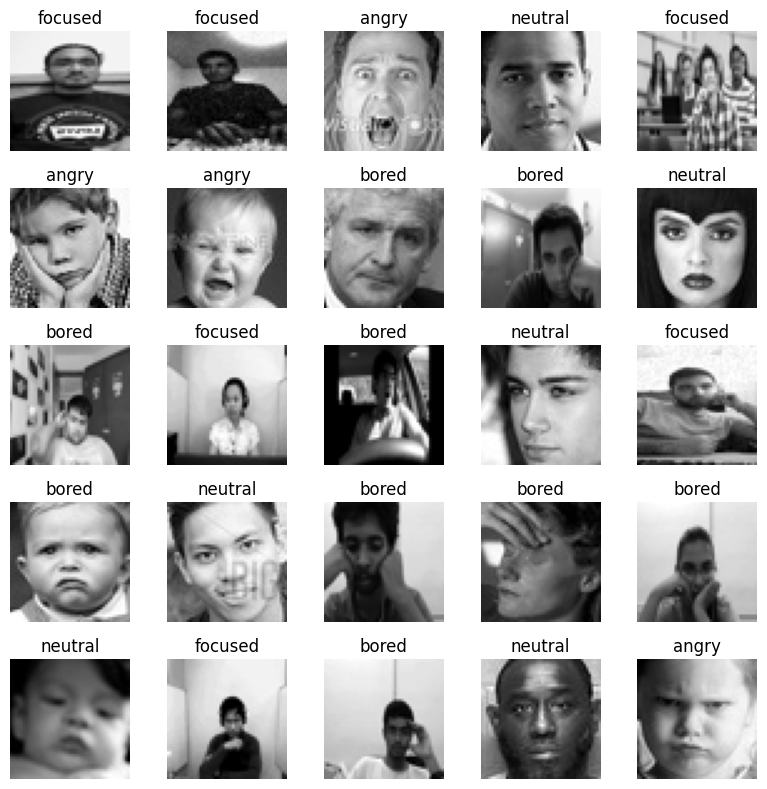

In [ ]:
# Showing Sample images
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
# Randomly select and display one image from each class
for i, ax in enumerate(axes.flat):
    class_folder = random.choice(dataset_dir_list)
    class_path = os.path.join(BASE_PATH, class_folder)
    images = os.listdir(class_path)
    image_name = random.choice(images)
    image_path = os.path.join(class_path, image_name)

    # Load and resize the image
    img = Image.open(image_path).convert('L')
    img = img.resize((48, 48))

    # Display the image
    ax.imshow(img, cmap = 'gray')
    ax.set_title(class_folder)
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of images
plt.show()


dict_keys(['angry', 'bored', 'neutral', 'focused'])
dict_values([507, 501, 576, 500])


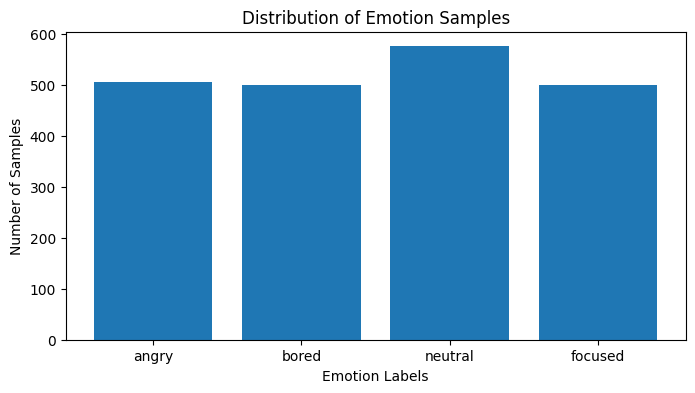

In [ ]:
# ploat Class distribution
plt.figure(figsize=(8, 4))
plt.bar(emotion_counts.keys(), emotion_counts.values())
plt.title('Distribution of Emotion Samples')
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Samples')
print(emotion_counts.keys())
print(emotion_counts.values())

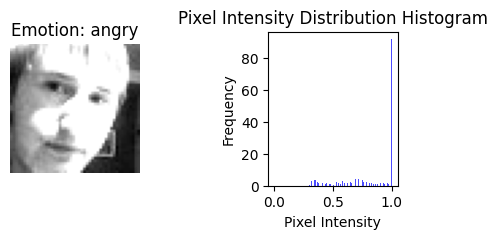

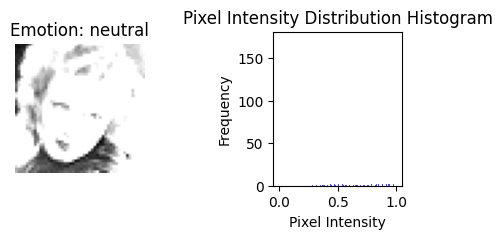

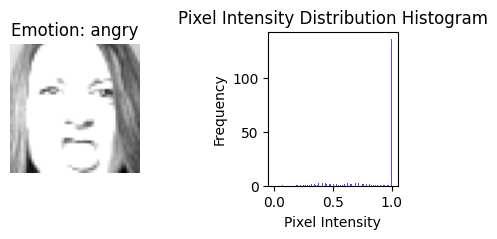

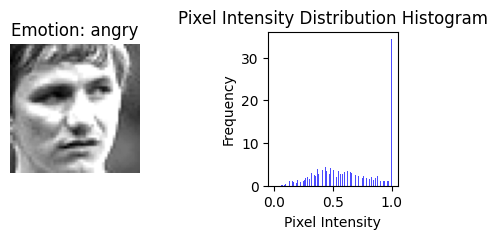

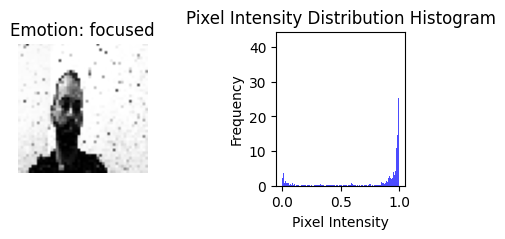

In [ ]:
# Select and plot a few sample images and their pixel intensity distribution
min_value = 0
max_value = (len(list_data)-1)
num_numbers = 5
sample_indices = [random.randint(min_value, max_value) for _ in range(num_numbers)]


for i, sample_idx in enumerate(sample_indices):

    # Create a figure with two subplots
    fig, (img1, img2) = plt.subplots(1, 2, figsize=(5, 2))


    # for gray scale image intensity histogram
    if len(img_data[sample_idx].shape) == 2:
      img1.imshow(img_data[sample_idx], cmap='gray')
      img1.set_title(f'Emotion: {list_label[sample_idx]}')
      img1.axis('off')


      plt.hist(img_data[sample_idx].ravel(), bins=256, range=(0, 1), density=True, color='blue', alpha=0.7)
      img2.set_title('Pixel Intensity Distribution Histogram')
      img2.set_xlabel('Pixel Intensity')
      img2.set_ylabel('Frequency')

      plt.subplots_adjust(wspace=1)

    # for RGB color image intensity histogram
    elif len(img_data[sample_idx].shape)==3:
      # Split the image into Red, Green, and Blue channels
      image = cv2.imread(img_data[sample_idx])
      b, g, r = cv2.split(image)

      plt.hist(r.flatten(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red Channel')
      plt.hist(g.flatten(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green Channel')
      plt.hist(b.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue Channel')

    # Plot the pixel intensity distribution for RGB image histogram

      img2.set_xlabel('Pixel Intensity')
      img2.set_ylabel('Frequency')
      img2.set_title('RGB Channel Intensity Distribution')
      img2.legend()


      plt.subplots_adjust(wspace=1)

plt.show()


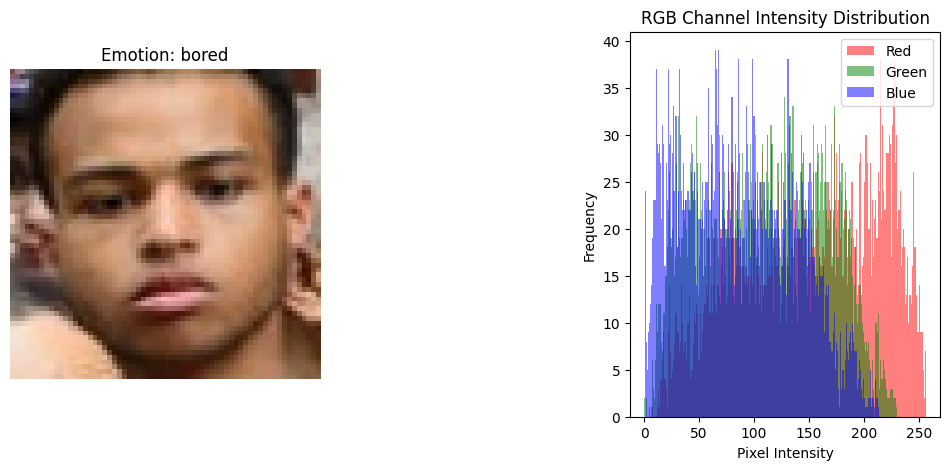

In [ ]:

image = cv2.imread('/content/drive/MyDrive/AI Project/Dataset/bored/24819.jpg')

fig, (img1, img2) = plt.subplots(1, 2, figsize=(12, 5))

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img1.set_title(f'Emotion: bored')
img1.imshow(image_rgb)
img1.axis('off')


b, g, r = cv2.split(image)


# img2.figure(figsize=(6, 4))

# Plot histograms for each channel on the same graph
plt.hist(r.flatten(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red',align='right')
plt.hist(g.flatten(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green',align='mid')
plt.hist(b.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue',align='right')
plt.subplots_adjust(wspace=1)

# Set labels and titles
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('RGB Channel Intensity Distribution')
plt.legend()

plt.subplots_adjust(wspace=1)
# Show the histogram
plt.show()


**PART 2: Building CNN**

In [ ]:
#training and testing split and train and test loader

def dataset_split_and_loader(batch_size,shuffle = False):

  # Split the data into training, validation, and testing sets (70% training, 15% validation, 15% testing)
  # X = img_data ---feature matrix
  # Y = labels ---target var
  X_train, X_temp, Y_train, Y_temp = train_test_split(img_data, img_label, test_size=0.3, random_state=42)
  X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

  # Now X_train and y_train contain the training data, X_val and y_val contain the validation data,

  #--- normalize values

  X_train = np.array(X_train,'float32')
  Y_train = np.array(Y_train,'float32')
  X_test = np.array(X_test,'float32')
  Y_test = np.array(Y_test,'float32')
  X_val = np.array(X_val,'float32')
  Y_val = np.array(Y_val,'float32')

  X_train -= np.mean(X_train, axis=0)
  X_train /= np.std(X_train, axis=0)

  X_test -= np.mean(X_test, axis=0)
  X_test /= np.std(X_test, axis=0)

  X_val -= np.mean(X_val,axis=0)
  X_val /= np.std(X_val,axis=0)

  X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

  X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

  X_val = X_val.reshape(X_val.shape[0],48,48,1)


  #creating data loaders for training and testing
  X_train = torch.from_numpy(X_train)
  Y_train = torch.from_numpy(Y_train)

  print("x_train:",X_train.shape)
  print("y_train:",Y_train.shape)



  X_test = torch.from_numpy(X_test)
  Y_test = torch.from_numpy(Y_test)

  print("x_test:",X_test.shape)
  print("y_test:",Y_test.shape)

  X_val = torch.from_numpy(X_val)
  Y_val = torch.from_numpy(Y_val)

  print("X_val:",X_val.shape)
  print("Y_val:",Y_val.shape)

  train_dataset = td.TensorDataset(X_train, Y_train)
  train_loader = td.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True,pin_memory=True)

  test_dataset = td.TensorDataset(X_test,Y_test)
  test_loader = td.DataLoader(dataset = test_dataset,batch_size=batch_size,shuffle=True,pin_memory=True)

  val_dataset = td.TensorDataset(X_val,Y_val)
  validation_loader = td.DataLoader(dataset=val_dataset,batch_size=batch_size,shuffle=True,pin_memory=True)

  return train_loader, test_loader , validation_loader


batch_size = 32
train_loader, _ , _ = dataset_split_and_loader(batch_size)
_, test_loader,_ = dataset_split_and_loader(batch_size)
_, _ , val_loader = dataset_split_and_loader(batch_size)



In [ ]:

class CNN_Varient_1(nn.Module):
  def __init__(self,num_classes,kernel_size):
    self.kernel_size = kernel_size
    self.padding =1
    self.num_classes = num_classes


    #Initialize the parent class
    super(CNN_Varient_1,self) .__init__()


    self.conv_layer = nn.Sequential(

      #convolution layer-1
      nn.Conv2d(in_channels=1, out_channels=64, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      #convolution layer -2
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      # convolution layer 3
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(in_channels=256, out_channels=256, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      )

    self.fc_layer = nn.Sequential(

      nn.Linear(9216 , 1024),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5),

      nn.Linear(1024, 512),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5),
      nn.Linear(512, self.num_classes),




    )
  def forward(self, x):
      # conv layers
      x = self.conv_layer(x)
      # flatten
      x = x.view(x.size(0), -1)
      # fc layer
      x = self.fc_layer(x)
      return x


model1_1 = CNN_Varient_1(kernel_size=3,num_classes=4)
# print(model1)

if cuda.is_available():
  model1_1 = model1_1.cuda()

summary(model1_1, (1, 48, 48))




In [ ]:
#VARIENT- : COMPILING MODEL

# compiling the main model

learning_rate = 0.00001
num_epochs = 80

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model1_1.parameters(),lr=learning_rate)

# total_step = len(train_loader)

train_loss_12 = []
train_accuracy_12 = []
val_loss_12 = []
val_accuracy_12 = []



for epoch in range(num_epochs):

  #for Trainning
  iter_loss = 0.0
  correct =0
  iterations = 0

  model1_1.train()  #put the network into training mode

  for i,(images,labels) in enumerate(train_loader):

    images = images.squeeze()
    images = images.unsqueeze(0)
    images = images.squeeze(0).unsqueeze(1)
    # print("after:",images.shape)

    if cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    # Forward pass
    outputs = model1_1(images)
    loss = criterion(outputs,labels.long())
    iter_loss += loss.data #accumulate the loss


    #backpropagation and optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #train accuracy
    total = labels.size(0)
    _,predicted = torch.max(outputs.data,1)
    correct += (predicted == labels.data).sum()
    iterations +=1


  train_loss_12.append(iter_loss/iterations)
  train_accuracy_12.append((100 * correct / len(train_loader.dataset)))

  #-------------for validation----------
  loss = 0.0
  correct = 0
  iterations = 0

  #network into evalute mode
  model1_1.eval()

  for i,(images,labels) in enumerate(val_loader):

     images = images.squeeze()
     images = images.unsqueeze(0)
     images = images.squeeze(0).unsqueeze(1)

     if cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

     outputs = model1_1(images)

     loss += criterion(outputs,labels.long()).data

     _,predicted = torch.max(outputs.data,1)
     correct += (predicted == labels.data).sum()

     iterations +=1

  # validation loss
  val_loss_12.append(loss/iterations)

  #validation Accuracy
  val_accuracy_12.append(correct / len(val_loader.dataset) * 100.0)

  print('Epoch [%d/%d], Tr Loss: %.4f, Tr Acc: %.4f, Val Loss: %4f, Val Acc: %4f'%(epoch+1,num_epochs,train_loss_12[-1],train_accuracy_12[-1],val_loss_12[-1],val_accuracy_12[-1]))





In [ ]:
#saving the model
model_path = "/content/drive/MyDrive/AI Project/saved_model/main_model.pth"
torch.save(model1_1.state_dict(), model_path)

In [ ]:
#check accuracy of VGG16 on testing data
def test_accuracy1():
  true_labels_list = []
  predicted_labels_list = []

  model1_1.eval()
  with torch.no_grad():
    correct = 0
    total =0

    for i,(images,labels) in enumerate(test_loader):

      images = images.squeeze()
      images = images.unsqueeze(0)
      images = images.squeeze(0).unsqueeze(1)
      true_labels_list.extend(labels.numpy())

      if cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
      # true.append(labels)
      outputs = model1_1(images)
      _,predicted = torch.max(outputs.data,1)
      predicted_labels_list.extend(predicted.cpu().numpy())
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    print("correct",correct)
    print("total",total)
    print('Test Accuracy of the  model on the test images: {} %'.format((correct / total) * 100))

  return true_labels_list,predicted_labels_list



y_test1,y_pred1 = test_accuracy1()


correct 202
total 313
Test Accuracy of the  model on the test images: 64.5367412140575 %


**Evaluation**

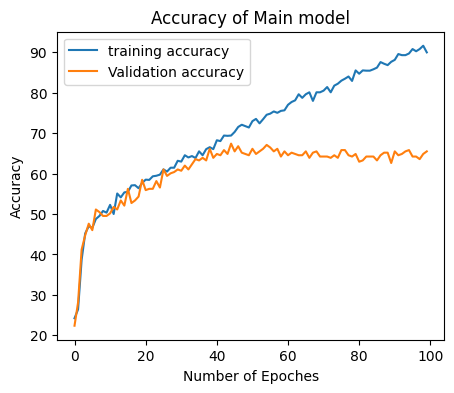

In [ ]:
#Visualize accuracy of model
def visualize_model_accuracy(train_accuracy,val_accuracy,model_name):

  list_train_accuracy = [tensor.cpu() for tensor in train_accuracy]
  list_val_accuracy = [tensor.cpu() for tensor in val_accuracy]

  f = plt.figure(figsize=(5,4))
  plt.plot(list_train_accuracy,label='training accuracy')
  plt.plot(list_val_accuracy,label='Validation accuracy')
  plt.title(f'Accuracy of {model_name}')
  plt.xlabel('Number of Epoches')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

visualize_model_accuracy(train_accuracy_12,val_accuracy_12,"Main model")

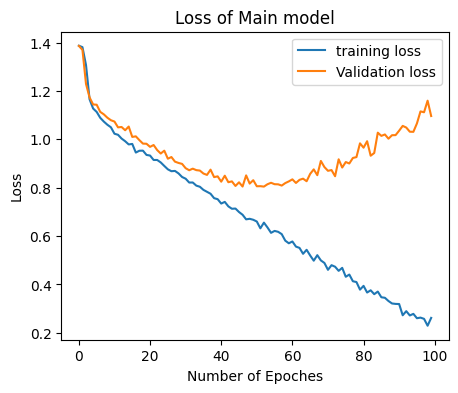

In [ ]:
#Visualize loss of model
def visualize_model_loss(train_loss,val_loss,model_name):
  list_train_loss = [tensor.cpu() for tensor in train_loss]
  list_val_loss = [tensor.cpu() for tensor in val_loss]

  f = plt.figure(figsize=(5,4))
  plt.plot(list_train_loss,label='training loss')
  plt.plot(list_val_loss,label='Validation loss')
  plt.title(f'Loss of {model_name}')
  plt.xlabel('Number of Epoches')
  plt.ylabel('Loss')

  plt.legend()
  plt.show()

visualize_model_loss(train_loss_12,val_loss_12,"Main model")

In [ ]:
#Confusion matrix

def plot_confusion_matrix(true_label,predicted_label,model_name):

  # print(true_label.shape)
  # print(len(true_label))
  # print(len(true_label))

  true_label = np.array(true_label)
  predicted_label = np.array(predicted_label)
  conf_matrix = confusion_matrix(true_label, predicted_label)
  classes = ('angry','bored','neutral','focused')
  ConfusionMatrixDisplay(conf_matrix, display_labels= classes).plot()
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(f'Confusion Matrix of {model_name}')
  plt.show()


plot_confusion_matrix(y_test1,y_pred1,"Main model")

NameError: ignored

In [ ]:
#accuracy,precision,recall,f1-measure

#for Main model

def find_P_R_A_F1(true_label,predicted_label,model_name):

  print(f'Evaluation of {model_name} on Testing Data :')
  pre_macro = precision_score(true_label, predicted_label, average='macro')
  pre_micro = precision_score(true_label, predicted_label, average='micro')
  print(f'Precision_macro: {pre_macro:.4f}')
  print(f'precision_micro: {pre_micro:.4f}')

  recall_macro = recall_score(true_label, predicted_label, average='macro')
  recall_micro = recall_score(true_label, predicted_label, average='micro')
  print(f'Recall_macro: {recall_macro:.4f}')
  print(f'recall_micro: {recall_micro:.4f}')

  accuracy = accuracy_score(true_label, predicted_label)
  print(f'Accuracy: {accuracy:.4f}')

  f1_macro = f1_score(true_label, predicted_label,average='macro')
  print(f'F1-Measure_macro: {f1_macro:.4f}')

  f1_micro = f1_score(true_label, predicted_label,average='micro')
  print(f'F1-Measure_micro: {f1_micro:.4f}')



find_P_R_A_F1(y_test1,y_pred1,"Main Model")




Evaluation of Main Model on Testing Data :
Precision_macro: 0.6267
precision_micro: 0.6166
Recall_macro: 0.6266
recall_micro: 0.6166
Accuracy: 0.6166
F1-Measure_macro: 0.6225
F1-Measure_micro: 0.6166


**Varient - 1**

In [ ]:
#designing the CNN Varient-1 Model

class CNN(nn.Module):
  def __init__(self,num_classes=4,kernel_size=3,padding=1):

    #Initialize the parent class
    super(CNN,self) .__init__()


    #Convolution Layers
    self.features = nn.Sequential(

        #convolution layer 1
        nn.Conv2d(in_channels=1,out_channels=64 ,kernel_size=kernel_size,padding=padding),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels =64, out_channels=64,kernel_size = kernel_size,padding =padding),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size=2,stride=2),

        #convolution layer 2
        nn.Conv2d(in_channels=64, out_channels=128 ,kernel_size=kernel_size,padding=padding),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels =128, out_channels=128,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size=2,stride=2),

        #convolution layer 3
        nn.Conv2d(in_channels=128, out_channels=256 ,kernel_size=kernel_size,padding=padding),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels =256, out_channels=256,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels =256, out_channels=256,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels =256, out_channels=256,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size=2,stride=2),

        #convolution layer 4
        nn.Conv2d(in_channels=256, out_channels=512 ,kernel_size=kernel_size,padding=padding),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels =512, out_channels=512,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels =512, out_channels=512,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels =512, out_channels=512,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size=2,stride=2),

        #convolution layer 5
        nn.Conv2d(in_channels=512, out_channels=512 ,kernel_size=kernel_size,padding=padding),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels =512, out_channels=512,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels =512, out_channels=512,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels =512, out_channels=512,kernel_size = kernel_size,padding = padding),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size=2,stride=2)

    )

    #Fully connected Layers

    self.avgpool = nn.AdaptiveAvgPool2d((7,7))
    self.classifier = nn.Sequential(
        nn.Linear(512* 7*7,4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),

        nn.Linear(4096,4096),
        nn.ReLU(inplace = True),
        nn.Dropout(0.5),
        nn.Linear(4096,num_classes),

    )
  def forward(self,x):
      # conv layers
    x = self.features(x)

    x = self.avgpool(x)

      #flatten
    # x = torch.flatten(x,1)
    x = x.view(x.size(0), -1)

      #fc layer
    x = self.classifier(x)



    return x



#Instantiate the Model
model = CNN(num_classes=4,kernel_size=3)

if cuda.is_available():
  model = model.cuda()

# print(model)

summary(model, (1, 48, 48))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]             640
              ReLU-2           [-1, 64, 48, 48]               0
            Conv2d-3           [-1, 64, 48, 48]          36,928
              ReLU-4           [-1, 64, 48, 48]               0
         MaxPool2d-5           [-1, 64, 24, 24]               0
            Conv2d-6          [-1, 128, 24, 24]          73,856
              ReLU-7          [-1, 128, 24, 24]               0
            Conv2d-8          [-1, 128, 24, 24]         147,584
              ReLU-9          [-1, 128, 24, 24]               0
        MaxPool2d-10          [-1, 128, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         295,168
             ReLU-12          [-1, 256, 12, 12]               0
           Conv2d-13          [-1, 256, 12, 12]         590,080
             ReLU-14          [-1, 256,

In [ ]:
# compiling the main model

learning_rate = 0.00001
num_epochs = 100


#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# total_step = len(train_loader)

train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []



for epoch in range(num_epochs):

  #for Trainning
  iter_loss = 0.0
  correct =0
  iterations = 0

  model.train()  #put the network into training mode

  for i,(images,labels) in enumerate(train_loader):
    # print(images.shape)
    images = images.squeeze()
    images = images.unsqueeze(0)
    images = images.squeeze(0).unsqueeze(1)
    # print("after:",images.shape)



    if cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    # Forward pass
    outputs = model(images)
    # outputs = outputs.type(torch.LongTensor)
    # labels = labels.type(torch.LongTensor)
    loss = criterion(outputs,labels.long())
    iter_loss += loss.data #accumulate the loss


    #backpropagation and optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #train accuracy
    total = labels.size(0)
    _,predicted = torch.max(outputs.data,1)
    correct += (predicted == labels.data).sum()
    iterations +=1


  train_loss.append((iter_loss/iterations))
  train_accuracy.append((100 * correct / len(train_loader.dataset)))


  #-----------------For Validation-------------------------------

  loss = 0.0
  correct = 0
  iterations = 0

  #network into evalute mode
  model.eval()

  for i,(images,labels) in enumerate(val_loader):

     images = images.squeeze()
     images = images.unsqueeze(0)
     images = images.squeeze(0).unsqueeze(1)

     if cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

     outputs = model(images)

     loss += criterion(outputs,labels.long()).data

     _,predicted = torch.max(outputs.data,1)
     correct += (predicted == labels.data).sum()

     iterations +=1

  # validation loss
  val_loss.append(loss/iterations)

  #validation Accuracy
  val_accuracy.append(correct / len(val_loader.dataset) * 100.0)

  print('Epoch [%d/%d], Tr Loss: %.4f, Tr Acc: %.4f, Val Loss: %4f, Val Acc: %4f'%(epoch+1,num_epochs,train_loss[-1],train_accuracy[-1],val_loss[-1],val_accuracy[-1]))







In [ ]:
#check accuracy on testing data
def test_accuracy():
  true_labels_list = []
  predicted_labels_list = []

  model.eval()
  with torch.no_grad():
    correct = 0
    total =0

    for i,(images,labels) in enumerate(test_loader):
      images = images.squeeze()
      images = images.unsqueeze(0)
      images = images.squeeze(0).unsqueeze(1)



      true_labels_list.extend(labels.numpy())
      if cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

      # true.append(labels)
      outputs = model(images)
      _,predicted = torch.max(outputs.data,1)

      predicted_labels_list.extend(predicted.cpu().numpy())
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    print("correct",correct)
    print("total",total)
    print('Test Accuracy of the model on the test images: {} %'.format((correct / total) * 100))

  return true_labels_list,predicted_labels_list



y_test,y_pred = test_accuracy()


correct 190
total 313
Test Accuracy of the model on the test images: 60.70287539936102 %


In [ ]:
#saving the model
model_path = "/content/drive/MyDrive/AI Project/saved_model/Varient_1.pth"
torch.save(model.state_dict(), model_path)

**Evaluation**

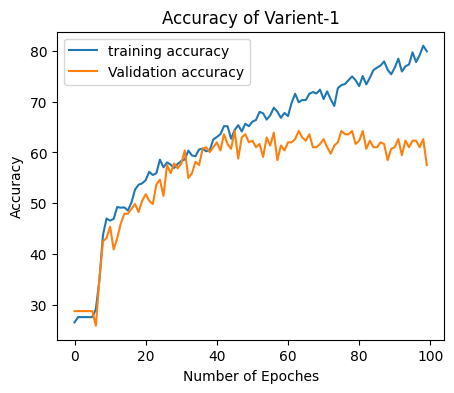

In [ ]:
#Visualize Accuracy of model
visualize_model_accuracy(train_accuracy,val_accuracy,"Varient-1")

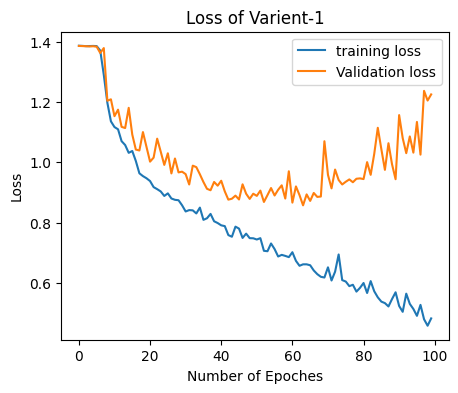

In [ ]:
#Visualize loss of model
visualize_model_loss(train_loss,val_loss,"Varient-1")


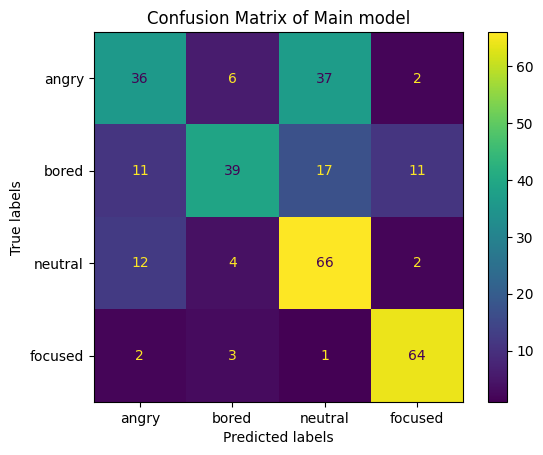

In [ ]:
#Confusion Matrix
plot_confusion_matrix(y_test,y_pred,"Varient-1")



In [ ]:
#accuracy,precision,recall,f1-measure
find_P_R_A_F1(y_test,y_pred,"Varient-1")

Evaluation of Varient-1 on Testing Data :
Precision_macro: 0.6228
precision_micro: 0.6070
Recall_macro: 0.6173
recall_micro: 0.6070
Accuracy: 0.6070
F1-Measure_macro: 0.6182
F1-Measure_micro: 0.6070


**Varient-2: Model**

In [ ]:
#Varient -2 :
class CNN_Varient_2(nn.Module):
  def __init__(self,num_classes,kernel_size):
    self.kernel_size = kernel_size
    self.padding =1
    self.num_classes = num_classes


    #Initialize the parent class
    super(CNN_Varient_2,self) .__init__()


    self.conv_layer = nn.Sequential(

      #convolution layer-1
      nn.Conv2d(in_channels=1, out_channels=64, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      #convolution layer -2
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      # convolution layer 3
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(in_channels=256, out_channels=256, kernel_size=self.kernel_size, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      )

    self.fc_layer = nn.Sequential(

      nn.Linear(1024 , 1024),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5),

      nn.Linear(1024, 512),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5),
      nn.Linear(512, self.num_classes),




    )
  def forward(self, x):
      # conv layers
      x = self.conv_layer(x)
      # flatten
      x = x.view(x.size(0), -1)
      # fc layer
      x = self.fc_layer(x)
      return x


model2 = CNN_Varient_2(kernel_size=5,num_classes=4)
# print(model1)

if cuda.is_available():
  model2 = model2.cuda()

summary(model2, (1, 48, 48))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 46, 46]           1,664
         LeakyReLU-2           [-1, 64, 46, 46]               0
            Conv2d-3           [-1, 64, 44, 44]         102,464
         LeakyReLU-4           [-1, 64, 44, 44]               0
         MaxPool2d-5           [-1, 64, 22, 22]               0
            Conv2d-6          [-1, 128, 20, 20]         204,928
         LeakyReLU-7          [-1, 128, 20, 20]               0
            Conv2d-8          [-1, 128, 18, 18]         409,728
         LeakyReLU-9          [-1, 128, 18, 18]               0
        MaxPool2d-10            [-1, 128, 9, 9]               0
           Conv2d-11            [-1, 256, 7, 7]         819,456
        LeakyReLU-12            [-1, 256, 7, 7]               0
           Conv2d-13            [-1, 256, 5, 5]       1,638,656
        LeakyReLU-14            [-1, 25

In [ ]:
# compiling Varient -2 model

learning_rate = 0.00001
num_epochs = 80

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model2.parameters(),lr=learning_rate)

# total_step = len(train_loader)

train_loss_21 = []
train_accuracy_21 = []
val_loss_21 = []
val_accuracy_21 = []



for epoch in range(num_epochs):

  #for Trainning
  iter_loss = 0.0
  correct =0
  iterations = 0

  model2.train()  #put the network into training mode

  for i,(images,labels) in enumerate(train_loader):

    images = images.squeeze()
    images = images.unsqueeze(0)
    images = images.squeeze(0).unsqueeze(1)
    # print("after:",images.shape)

    if cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    # Forward pass
    outputs = model2(images)
    loss = criterion(outputs,labels.long())
    iter_loss += loss.data #accumulate the loss


    #backpropagation and optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #train accuracy
    total = labels.size(0)
    _,predicted = torch.max(outputs.data,1)
    correct += (predicted == labels.data).sum()
    iterations +=1


  train_loss_21.append(iter_loss/iterations)
  train_accuracy_21.append((100 * correct / len(train_loader.dataset)))


  #-----------------For Validation-------------------------------

  loss = 0.0
  correct = 0
  iterations = 0

  #network into evalute mode
  model2.eval()

  for i,(images,labels) in enumerate(val_loader):

     images = images.squeeze()
     images = images.unsqueeze(0)
     images = images.squeeze(0).unsqueeze(1)

     if cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()


     outputs = model2(images)

     loss += criterion(outputs,labels.long()).data

     _,predicted = torch.max(outputs.data,1)
     correct += (predicted == labels.data).sum()

     iterations +=1

  # validation loss
  val_loss_21.append(loss/iterations)

  #validation Accuracy
  val_accuracy_21.append(correct / len(val_loader.dataset) * 100.0)

  print('Epoch [%d/%d], Tr Loss: %.4f, Tr Acc: %.4f, Val Loss: %4f, Val Acc: %4f'%(epoch+1,num_epochs,train_loss_21[-1],train_accuracy_21[-1],val_loss_21[-1],val_accuracy_21[-1]))







Epoch [1/80], Tr Loss: 1.3853, Tr Acc: 26.6804, Val Loss: 1.382261, Val Acc: 38.019169


KeyboardInterrupt: ignored

In [ ]:
#saving the model
model_path = "/content/drive/MyDrive/AI Project/saved_model/varient_2.pth"
torch.save(model2.state_dict(), model_path)

In [ ]:
#check accuracy on testing data
def test_accuracy2():
  true_labels_list = []
  predicted_labels_list = []

  model2.eval()
  with torch.no_grad():
    correct = 0
    total =0

    for i,(images,labels) in enumerate(test_loader):

      images = images.squeeze()
      images = images.unsqueeze(0)
      images = images.squeeze(0).unsqueeze(1)
      true_labels_list.extend(labels.numpy())

      if cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

      # true.append(labels)
      outputs = model2(images)
      _,predicted = torch.max(outputs.data,1)
      predicted_labels_list.extend(predicted.cpu().numpy())
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    print("correct",correct)
    print("total",total)
    print('Test Accuracy of the model on the test images: {} %'.format((correct / total) * 100))

  return true_labels_list,predicted_labels_list



y_test2,y_pred2 = test_accuracy2()


correct 206
total 313
Test Accuracy of the model on the test images: 65.814696485623 %


**Varient-2: Evaluation**

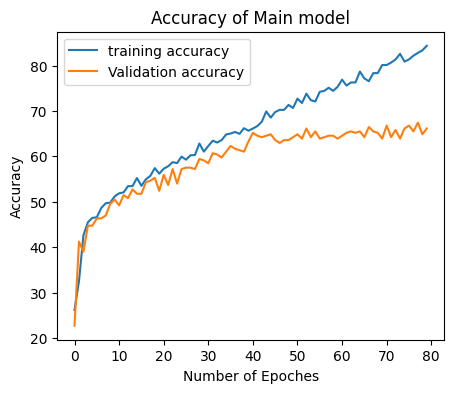

In [ ]:
#Visualize model Accuracy
visualize_model_accuracy(train_accuracy_21,val_accuracy_21,"Varient-2")

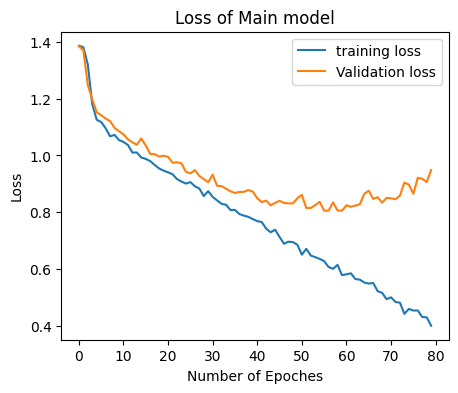

In [ ]:
#Visualize model loss
visualize_model_loss(train_loss_21,val_loss_21,"Varient-2")

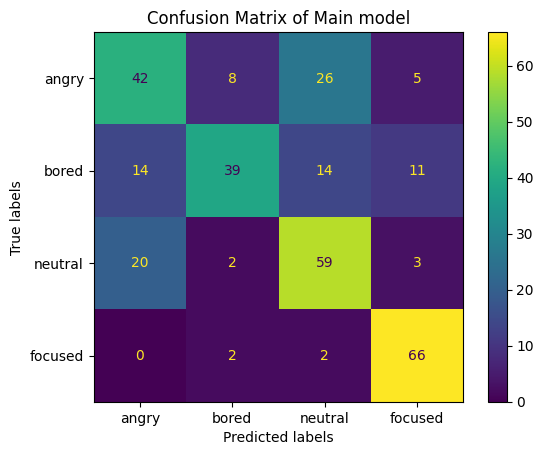

In [ ]:
#Confusion matrix
plot_confusion_matrix(y_test2,y_pred2,"Varient-2")


In [ ]:
#accuracy,precision,recall,f1-measure

find_P_R_A_F1(y_test2,y_pred2,"Varient-2")

Evaluation of Main model on Testing Data :
Precision_macro: 0.6695
precision_micro: 0.6581
Recall_macro: 0.6659
recall_micro: 0.6581
Accuracy: 0.6581
F1-Measure_macro: 0.6573
F1-Measure_micro: 0.6581
